In [37]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pareto
import random
import functions as f

```import functions as f``` : imports the package where we defined all of our functions

In [38]:
#GLOBAL CONSTANTS
clv_theory = 10 
size= 10000 # size of each sample
n = 10000 # number of samples
DureeObs = 12*2 # duration of observation

## Exponential (not censored)

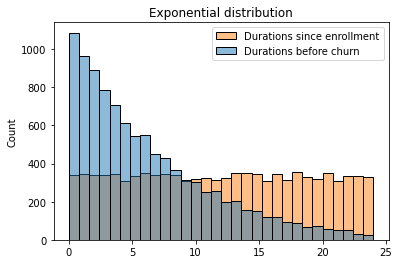

In [39]:
sns.histplot( f.generate_exponential(clv_theory, size,DureeObs)).set(title="Exponential distribution")
plt.legend(['Durations since enrollment','Durations before churn'])
plt.show()

This plot shows the distribution of the generated data.

**CLV computing**

Here, we are going to use a Monte Carlo simulation where we generate n samples and compute the clv values with the theoretical estimator. After that, we are going to see how it converges to the supposed clv in theory.

In [ ]:
# CONSTANT
censored = 0
# Monte Carlo simulation
clv_exp_nc, Y_n = f.monte_carlo(clv_theory, size, n, censored, f.exp_nc_clv_estimator, f.generate_nc_exponential)

CONVERGENCE :
 	 size of each dataset =10000 
 	 number of datasets =10000 
 	 CLV thoery = 10.00 
 	 CLV real = 10.000906  
 	 Standard deviation CLV= 0.099114


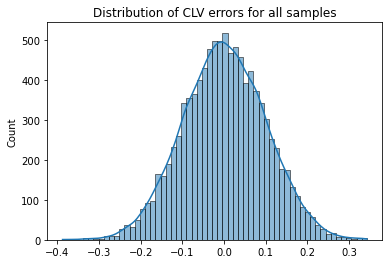

In [41]:
f.print_conv_plot_distribution(size, n ,clv_theory, clv_exp_nc)

The plot illustrates that the prediction errors follow a Gaussian distribution with a mean of zero. This indicates that, as per the Law of Large Numbers, the estimator tends to converge towards the theoretical value which can be visualised in the following plot.

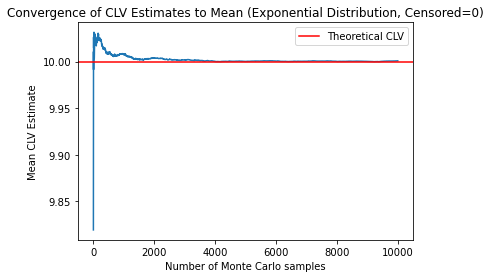

In [42]:
f.clv_convergence(clv_exp_nc, clv_theory,n , 'Convergence of CLV Estimates to Mean (Exponential Distribution, Censored=0)')

**Confidence interval - Monte Carlo**

Since, we don't have the thoeretical approach to compute confidence interval for our best CLV estimator, we use the Monte Carlo method which is supposed to converge to the theoretical values.

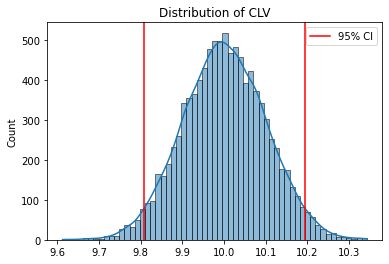

IC = [9.808195 , 10.195024 ] 


In [43]:
lower_exp_nc, upper_exp_nc = f.CI_plot_95(clv_exp_nc, 0.05)

95% of the CLV values of the all the Monte Carlo samples are within this confidence interval.

## Exponential (censored)

**CLV computing**

In [44]:
# CONSTANT
censored = 1
# Monte Carlo simulation
clv_exp_c, Y_n =f. monte_carlo(clv_theory, size, n, censored, f.exp_c_clv_estimator, f.generate_exponential)

CONVERGENCE :
 	 size of each dataset =10000 
 	 number of datasets =10000 
 	 CLV thoery = 10.00 
 	 CLV real = 10.002106  
 	 Standard deviation CLV= 0.127729


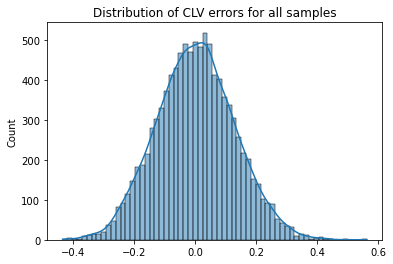

In [45]:
f.print_conv_plot_distribution(size, n ,clv_theory, clv_exp_c)

The error is still normally distributed and the standart deviation is higher. 
As censored data are normally distributed, they have no impact on the error distribution. Censored data increase the std of the error by 40% comparing to non censored data.

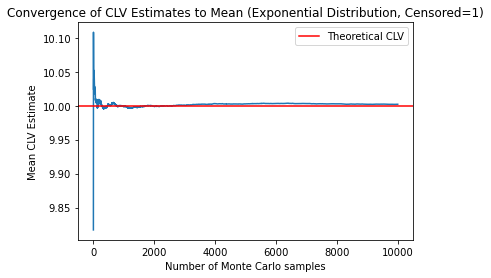

In [46]:
f.clv_convergence(clv_exp_c, clv_theory,n , 'Convergence of CLV Estimates to Mean (Exponential Distribution, Censored=1)')

**Theoretical confidence intervals**

In [47]:
lower_exp_c = []
upper_exp_c = []
for i in range(n):
    lower_exp_c.append(f.CI_exp_c_clv(1.96, Y_n[i][0], Y_n[i][1])[0])
    upper_exp_c.append(f.CI_exp_c_clv(1.96, Y_n[i][0], Y_n[i][1])[1])

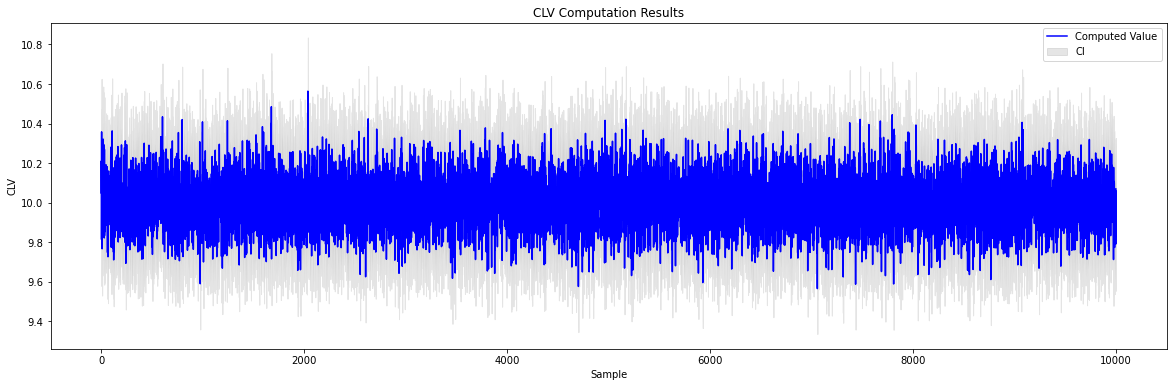

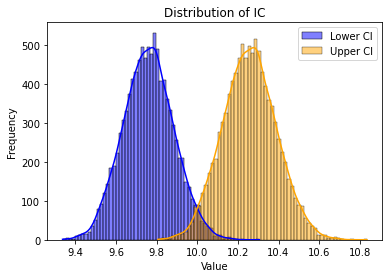

Theoritical_CI = [9.759376633590364, 10.257217395825881 ]. 
 CONFIDENCE LEVEL: 94.88% of estimators are within this interval


In [48]:
# plot confidence interval
f.CI_multiplot(clv_exp_c, lower_exp_c, upper_exp_c)

Using the Monte Carlo method is an efficient approach to test the theoretical formula, as it often yields similar results to those obtained using theoretical formulas. So, to check the confidence level, we compute the clv values of the n samples (generated with Monte Carlo simulation) and then check if 95% are within it. As we can see after the plots, 95.33% of clv valus are inside the theoretical confidence interval. Hence, the validation of the confidence interval calculted in theory.

**Bootstrap confidence intervals**

Although the confidence intervals have been calculated using the theoretical formula, the purpose of this section is to verify the results using the bootstrap method.

In [49]:
# GENERATE one sample to study the effect of boostrapping
Y_n =[]
T, A = f.generate_exponential(clv_theory, size, DureeObs)
Y_n.append(T)
Y_n.append(A)

In [50]:
lower_exp_ct , upper_exp_ct = f.CI_exp_c_clv(1.96, T, A)
print("IC theory = [%f,%f]"%(lower_exp_ct,upper_exp_ct))

IC theory = [9.772994,10.271172]


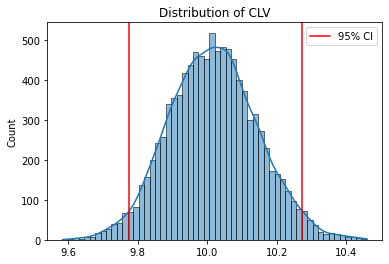

IC = [9.776592 , 10.272090 ] 


In [51]:
_,_ , clv_exp_cb = f.bootstrap_samples(Y_n, censored, f.exp_c_clv_estimator)
lower_exp_cb, upper_exp_cb  = f.CI_plot_95(clv_exp_cb, 0.05)

In [52]:
print("Bootstrapping method IC lower bound is %.3f %% different from the theoretical IC lower bound."%(round(100*abs(lower_exp_cb-lower_exp_ct)/lower_exp_cb,3)))
print("Bootstrapping method IC upper bound is %.3f %% different from the theoretical IC upper bound."%(round(100*abs(upper_exp_cb-upper_exp_ct)/upper_exp_cb,3)))

Bootstrapping method IC lower bound is 0.037 % different from the theoretical IC lower bound.
Bootstrapping method IC upper bound is 0.009 % different from the theoretical IC upper bound.


As we can see the bootstrapping method has less than 0.05% of error comparing to the theoretical bounds. So we can clearly conclude that when we cannot find and compute the formula of the confidence interval (which is commonly the case in practice since we don't know exactly the distribution of the data), the bootstrapping method can be a good solution.

# Finding the best n